In [1]:
# imports
import sys
import numpy as np
import pandas as pd
sys.path.append('../../') # to access the files in higher directories
sys.path.append('../') # to access the files in higher directories
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import core_exp as cx
import core_calib as cal
import core_tools as ct

In [2]:
params = {
    # exp
    "seed": 0,
    "runs": 5,
    "exp_name": ct.generate_readable_short_id(), #"main_run5_cv5_21data_100trees_40opt_fast",
    "path": "../../",
    "split": "CV", #CV, random_split
    # "test_split": 0.3,
    # "calib_split": 0.1,
    "cv_folds": 5,
    "plot": True,
    "calib_methods": ["RF_d", "RF_opt",
                    #   "Platt", "ISO", "Beta", "CRF", "VA",
                    #   "tlr", #"Rank", #"Elkan"
                      # "RF_ens_k", "RF_ens_r", 
                      "RF_large",
                      ],
    
    "metrics": ["acc", "ece", "logloss", "tce", "BS", "BS2", "CL", "GL", "IL"], 

    #data
    "data_name": "synthetic",
    "plot_data": True,
    "data_size": 1000,
    "n_copy": 10,
    "n_features": 2,
    "n_informative": 15, 
    "n_redundant": 5, 
    "n_repeated": 0, 

    "class1_mean_min":0, 
    "class1_mean_max":1,
    "class2_mean_min":1, 
    "class2_mean_max":3, 

    # calib param
    "bin_strategy": "uniform",
    "ece_bins": 20,
    "boot_size": 1000, 
    "boot_count": 5,

    # RF hyper opt
    "hyper_opt": True, # Manual
    "opt_cv":5, 
    "opt_n_iter":20,
    "opt_top_K": 5,
    "search_space": {
                    "n_estimators": [20],
                    "max_depth": np.arange(2, 101).tolist(),
                    # "criterion": ["gini", "entropy"],
                    # "max_features": ["sqrt", "log2"],
                    # "min_samples_split": [2,3,4,5],
                    # "min_samples_leaf": [1,2,3],
                    "oob_score": [False]
                    },
    
    "n_estimators": 20,
    "oob": False,

    "exp_key": "depth",
    "exp_values": [1,2,3,4,5]
}

ct.save_params(params)

In [3]:
calib_results_dict, data_list = cx.run_exp(params["exp_key"], params["exp_values"], params)
ct.save_results(calib_results_dict, params['exp_name'])

exp_param 1 done
exp_param 2 done
exp_param 3 done
exp_param 4 done
exp_param 5 done


In [4]:
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=True, 
                                    std=True)

In [5]:
tables["tce"]

,RF_d,RF_opt,Platt,ISO,Beta,CRF,VA,tlr,RF_large
Data,,,,,,,,,
1,0.036653,0.006062,0.020947,0.021527,0.021196,0.027064,0.020928,0.024277,0.031275
2,0.036653,0.006062,0.012226,0.013070,0.012075,0.012818,0.011918,0.027492,0.012416
3,0.036653,0.006062,0.009419,0.011053,0.009075,0.008065,0.009702,0.026277,0.005846
4,0.036653,0.006062,0.008702,0.011240,0.008249,0.006995,0.009904,0.026200,0.004113
5,0.036653,0.006062,0.010756,0.013555,0.010352,0.009479,0.012053,0.028971,0.004861
Mean,0.036653,0.006062,0.012410,0.014089,0.012189,0.012884,0.012901,0.026643,0.011702
Rank,9.000000,1.600000,4.400000,6.600000,3.800000,4.400000,4.400000,7.600000,3.200000


In [6]:
tables["BS"]

,RF_d,RF_opt,Platt,ISO,Beta,CRF,VA,tlr,RF_large
Data,,,,,,,,,
1,0.197371,0.143269,0.157474,0.158096,0.157716,0.163604,0.157467,0.161154,0.167748
2,0.197371,0.143269,0.149033,0.149773,0.148839,0.149531,0.148624,0.164821,0.149164
3,0.197371,0.143269,0.146380,0.148138,0.146036,0.145017,0.146696,0.163225,0.142744
4,0.197371,0.143269,0.146258,0.148638,0.145725,0.144619,0.147220,0.164326,0.141386
5,0.197371,0.143269,0.148631,0.151216,0.148151,0.147416,0.149515,0.167679,0.142775
Mean,0.197371,0.143269,0.149555,0.151172,0.149293,0.150037,0.149904,0.164241,0.148763
Rank,1.000000,8.400000,5.600000,3.400000,6.200000,5.600000,5.600000,2.400000,6.800000


In [7]:
# ct.res_statistics(tables, params["metrics"], f"results/{params['exp_name']}")

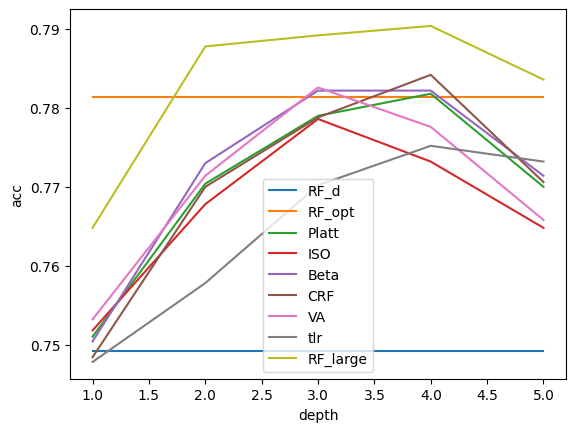

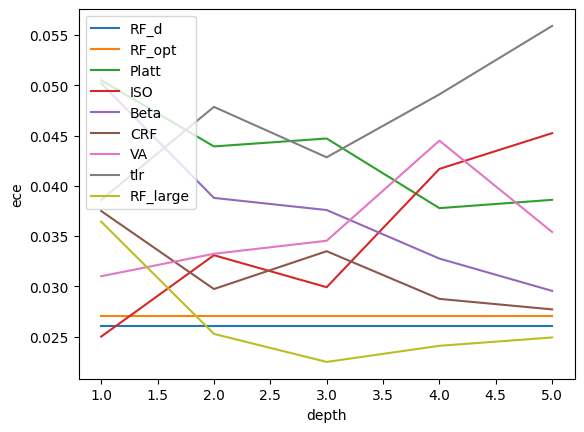

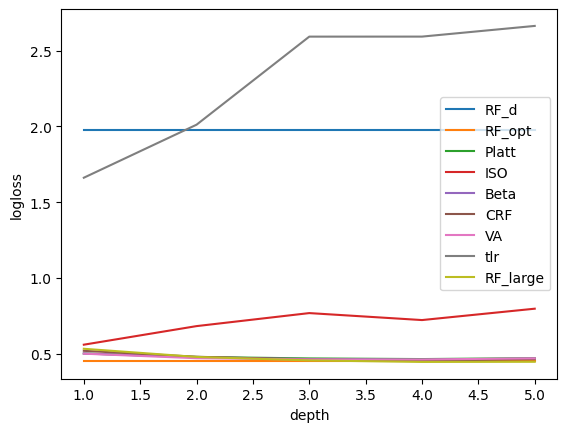

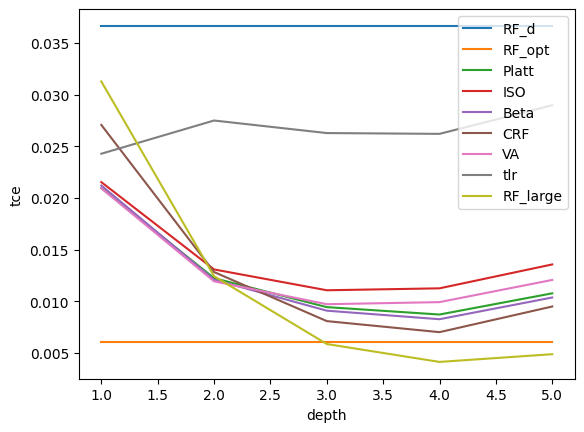

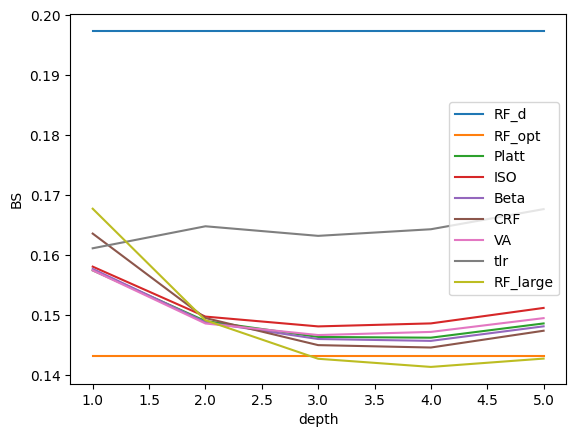

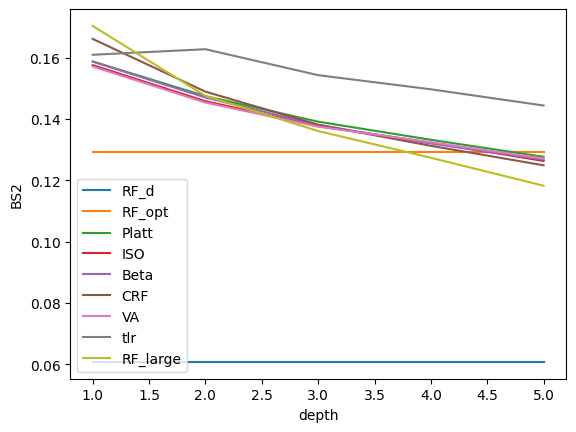

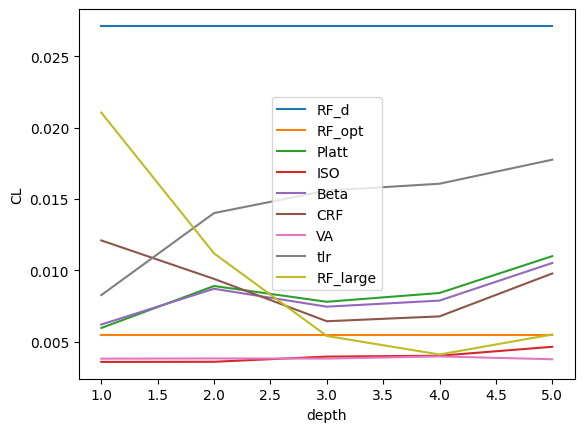

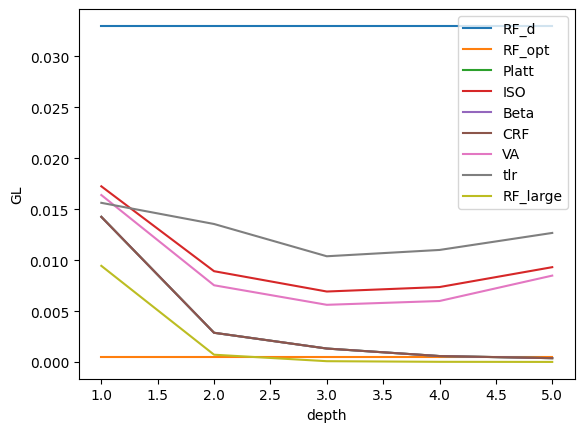

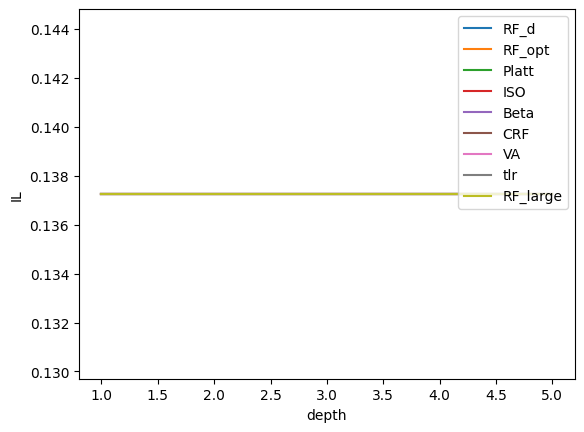

In [8]:
plot_calib_methods = params["calib_methods"].copy()

tables_plot = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=False, 
                                    std=True)
for metric in params["metrics"]:
    ax = tables_plot[metric][plot_calib_methods].plot()
    ax.set_xlabel(params["exp_key"])
    ax.set_ylabel(metric)